# **IMDB review data classification**

(참고)      
https://wikidocs.net/24586    
https://keras.io/examples/nlp/bidirectional_lstm_imdb/    
https://www.tensorflow.org/text/tutorials/text_classification_rnn      
https://dacon.io/en/codeshare/4642   
https://soki.tistory.com/32   
https://ssungkang.tistory.com/entry/%EB%94%A5%EB%9F%AC%EB%8B%9D05imdb-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EC%9D%B4%EC%A7%84-%EB%B6%84%EB%A5%98    
https://wikidocs.net/180687

In [ ]:
import numpy as np

##Preprocess Data 

### vocab_size 찾기           
**가장 자주 등장하는 단어 상위 vocab_size 수로 제한**   
(자주 등장하지 않은 단어는 불필요하기 때문)

In [ ]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data()

print(f'훈련용 리뷰 개수: {len(X_train)}')
print(f'테스트용 리뷰 개수: {len(X_test)}')

17464789/17464789 [==============================] - 0s 0us/step
훈련용 리뷰 개수: 25000
테스트용 리뷰 개수: 25000


In [ ]:
X_train[:2]  # 2개의 리뷰 샘플 출력

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [ ]:
print(type(X_train))    # 전체적인 X_train type
print(type(X_train[0]))  # X_train에 있는 하나의 데이터에 대한 type

<class 'numpy.ndarray'>
<class 'list'>


* X_train, X_test 모두 25000개의 리스트 구조의 리뷰들을 포함하는 배열 구조이다.    
* 이때 숫자들은 단어를 뜻하며, 하나의 리스트 당 하나의 리뷰를 뜻한다

In [ ]:
print(f'Label 카테고리 (train): {set(y_train)}')
print(f'Label 카테고리 (test): {set(y_test)}')

Label 카테고리 (train): {0, 1}
Label 카테고리 (test): {0, 1}


In [ ]:
y_train[:2]

array([1, 0])

In [ ]:
# y_train에서 0과 1의 개수
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


* y_train과 y_test 모두 0,1로 이루어진 배열 type
* 0: 부정, 1: 긍정
* 훈련 대상인 리뷰들의 긍부정 분포는 반반

In [ ]:
# 훈련 데이터의 총 단어 수
total = 0
for i in range(len(X_train)):
  total = total + len(X_train[i]) 

print(total)

5967841


In [ ]:
word_to_index = imdb.get_word_index()  
print(word_to_index)

1641221/1641221 [==============================] - 0s 0us/step
{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zani

* imdb.get_word_index(): 각 단어와 맵핑되는 정수 매뉴얼
* 주의할 점은 imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수이다. 이것은 IMDB 리뷰 데이터셋에서 정한 규칙이다

In [ ]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

print(index_to_word)
print(len(index_to_word))   # 맵핑 매뉴얼 단어의 개수

{34704: 'fawn', 52009: 'tsukino', 52010: 'nunnery', 16819: 'sonja', 63954: 'vani', 1411: 'woods', 16118: 'spiders', 2348: 'hanging', 2292: 'woody', 52011: 'trawling', 52012: "hold's", 11310: 'comically', 40833: 'localized', 30571: 'disobeying', 52013: "'royale", 40834: "harpo's", 52014: 'canet', 19316: 'aileen', 52015: 'acurately', 52016: "diplomat's", 25245: 'rickman', 6749: 'arranged', 52017: 'rumbustious', 52018: 'familiarness', 52019: "spider'", 68807: 'hahahah', 52020: "wood'", 40836: 'transvestism', 34705: "hangin'", 2341: 'bringing', 40837: 'seamier', 34706: 'wooded', 52021: 'bravora', 16820: 'grueling', 1639: 'wooden', 16821: 'wednesday', 52022: "'prix", 34707: 'altagracia', 52023: 'circuitry', 11588: 'crotch', 57769: 'busybody', 52024: "tart'n'tangy", 14132: 'burgade', 52026: 'thrace', 11041: "tom's", 52028: 'snuggles', 29117: 'francesco', 52030: 'complainers', 52128: 'templarios', 40838: '272', 52031: '273', 52133: 'zaniacs', 34709: '275', 27634: 'consenting', 40839: 'snuggle

In [ ]:
# 훈련 데이터의 단어 상위 빈도 수

word_num_list = []
for i in range(len(X_train)):
  for j in range(len(X_train[i])):
    word_num_list.append(X_train[i][j])


from collections import Counter
counter_dict = Counter(word_num_list)
print(counter_dict)

Counter({4: 336148, 5: 164097, 6: 163040, 7: 145847, 8: 135708, 9: 107313, 10: 101871, 11: 93934, 12: 79058, 13: 77142, 14: 75974, 15: 69787, 16: 48195, 17: 46927, 18: 44335, 19: 44122, 20: 43564, 21: 42594, 22: 39095, 23: 34188, 24: 30610, 25: 29877, 26: 29425, 27: 29366, 28: 27726, 29: 26952, 30: 26948, 31: 26513, 1: 25000, 32: 23953, 33: 23507, 34: 22539, 35: 21538, 36: 21139, 37: 20599, 38: 20586, 39: 20494, 40: 20272, 41: 18407, 42: 17994, 43: 17759, 44: 17371, 45: 17153, 46: 17092, 48: 16790, 47: 16790, 49: 15743, 50: 15735, 51: 15349, 52: 15100, 53: 14246, 54: 14175, 55: 14062, 56: 13274, 57: 12690, 58: 12682, 59: 12657, 60: 12650, 61: 12492, 62: 12238, 63: 12041, 64: 11915, 65: 11892, 66: 11734, 67: 11460, 68: 11376, 69: 11287, 70: 11120, 71: 10783, 72: 10742, 73: 10644, 74: 9919, 75: 9866, 76: 9758, 77: 9287, 78: 9270, 79: 9269, 80: 9193, 81: 9161, 82: 9157, 83: 9110, 84: 9102, 85: 9079, 86: 9057, 87: 9045, 88: 9044, 89: 8870, 90: 8865, 91: 8782, 92: 8445, 93: 8356, 94: 8144, 

In [ ]:
# 등장 빈도수가 {threshold}회 미만인 단어들의 비중을 확인하고, 약 2% 미만일 경우, 해당 희귀 단어들 제거

threshold = 6         # 등장 빈도수 기준 정의
total_cnt = len(index_to_word)  # 88584   # 맵핑 매뉴얼 단어의 개수 (단어 집합의 크기)
rare_cnt = 0                              # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                            # 훈련 데이터의 총 단어 수
rare_freq = 0                             # 등장 빈도수가 threshold보다 작은 단어의 개수

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in counter_dict.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", round((rare_cnt / total_cnt)*100,3))
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", round((rare_freq / total_freq)*100,3))

단어 집합(vocabulary)의 크기 : 88584
등장 빈도가 5번 이하인 희귀 단어의 수: 60954
단어 집합에서 희귀 단어의 비율: 68.809
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.819


In [ ]:
# 등장 빈도수가 5번 이하인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대크기로 제한

vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 27631


### Explore Data
**가장 자주 등장하는 단어 갯수를 제한하여 다시 IMDB 리뷰 데이터 불러오기**

In [ ]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

print(f'훈련용 리뷰 개수: {len(X_train)}')
print(f'테스트용 리뷰 개수: {len(X_test)}')

훈련용 리뷰 개수: 25000
테스트용 리뷰 개수: 25000


In [ ]:
import numpy as np
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


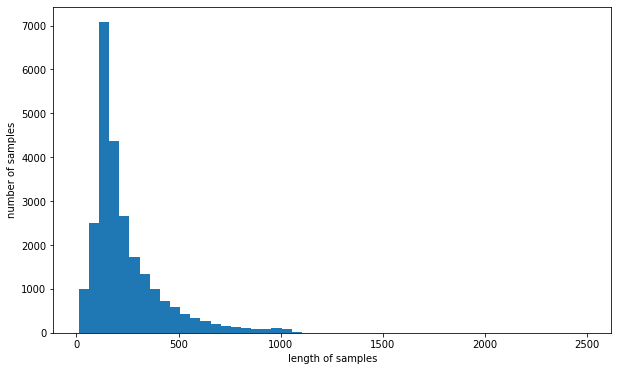

In [ ]:
# 하나의 리뷰당 평균 길이 및 최대 길이 구하기

import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.figure(figsize=(10,6))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

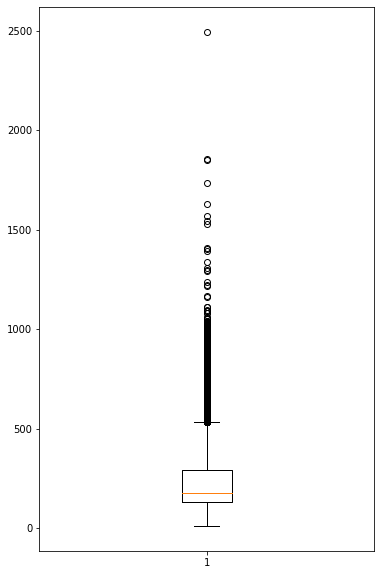

In [ ]:
plt.figure(figsize=(6,10))
plt.boxplot([len(review) for review in X_train])
plt.show()

### Padding
* 전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있는데, 서로 다른 길이의 샘플들의 길이를 동일하게 맞추는 작업이 필요하다.  
* X_train과 X_test의 모든 샘플의 길이를 특정 길이로 동일하게 맞춰줄 필요가 있는데, 특정 길이 변수를 max_len으로 정한다. 대부분의 리뷰가 내용이 잘리지 않도록 할 수 있는 최적의 max_len의 값을 구한다.   
* 이를 자연어 처리에서는 패딩(padding) 작업이라고 하는데, 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰준다. 케라스에서는 pad_sequence()를 사용하는데 pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채운다.
* padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 700
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 700 이하인 샘플의 비율: 96.72800000000001


전체 훈련 데이터 중 약 97%의 리뷰가 700이하의 길이를 가지는 것을 확인.    
모든 샘플의 길이를 700으로 맞추겠다.

In [ ]:
# 모든 샘플의 길이를 700으로 맞추기 - padding sequence는 padding = 'pre', truncating = 'post'
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 700
X_train_pre_post = pad_sequences(X_train, maxlen=max_len, truncating = 'post')
X_test_pre_post = pad_sequences(X_test, maxlen=max_len, truncating = 'post')

In [ ]:
# 모든 샘플의 길이를 700으로 맞추기 - padding sequence는 padding = 'post', truncating = 'post'
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 700
X_train_post_post = pad_sequences(X_train, maxlen=max_len, padding = 'post', truncating = 'post')
X_test_post_post = pad_sequences(X_test, maxlen=max_len, padding = 'post', truncating = 'post')

In [ ]:
# 모든 샘플의 길이를 700으로 맞추기 - - padding sequence는 padding = 'post', truncating = 'pre'
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 700
X_train_post_pre = pad_sequences(X_train, maxlen=max_len, padding = 'post', truncating = 'pre')
X_test_post_pre = pad_sequences(X_test, maxlen=max_len, padding = 'post', truncating = 'pre')

In [ ]:
# 모든 샘플의 길이를 700으로 맞추기 - padding sequence는 padding = 'pre', truncating = 'pre'
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 700
X_train_pre_pre = pad_sequences(X_train, maxlen=max_len, padding = 'pre', truncating = 'pre')
X_test_pre_pre = pad_sequences(X_test, maxlen=max_len, padding = 'pre', truncating = 'pre')

About pad_sequences  
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221242674418

## Modeling

**< 모델링 순서 >**    
1. 크게 LSTM 모델, GRU모델 두가지로 나눠 모델링한 후 두 모델의 성능을 비교  
2. LSTM, GRU 각각에 대해서도 hidden state, drop out.. 등등 여러 파라미터 값을 넣어보며 비교
3. (중요) 파라미터를 바꿔가면서 모델링 하기 전, 먼저 X_train과 X_test에 대해 각기 다른 패딩 작업해서 나온 새로운 X_train,, X_test을 이용하여 기본 모델링 진행 후, 가장 성능이 좋게 나온 X_train, X_test로 모델링 진행한다

**< activation = 활성화 함수 >**
- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.
- sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- relu : 은닉층에 주로 사용되는 활성화 함수.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
# 런타임 GPU check
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [ ]:
# 고정 값 설정  (고정 해주는 것이 좋음)
np.random.seed(42)
tf.random.set_seed(42)

### LSTM

#### padding 조건 비교

In [ ]:
# 텐서보드 구동을 위한 log 지정
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "LSTM_pre_post"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

In [ ]:
model1 = Sequential([
    Embedding(vocab_size, output_dim=256),
    Dropout(0.4),
    LSTM(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         7073536   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,283,657
Trainable params: 7,283,657
Non-

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model1.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model1.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model1.fit(X_train_pre_post, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 40s 57ms/step - loss: 0.4540 - accuracy: 0.7890 - val_loss: 0.3889 - val_accuracy: 0.8194
Epoch 2/30
625/625 [==============================] - 29s 47ms/step - loss: 0.2499 - accuracy: 0.9043 - val_loss: 0.3391 - val_accuracy: 0.8670
Epoch 3/30
625/625 [==============================] - 27s 44ms/step - loss: 0.1461 - accuracy: 0.9478 - val_loss: 0.3401 - val_accuracy: 0.8638
Epoch 4/30
625/625 [==============================] - 27s 43ms/step - loss: 0.0964 - accuracy: 0.9673 - val_loss: 0.5730 - val_accuracy: 0.8388
Epoch 5/30
625/625 [==============================] - 26s 41ms/step - loss: 0.0620 - accuracy: 0.9796 - val_loss: 0.5321 - val_accuracy: 0.8426
Epoch 6/30
625/625 [==============================] - 31s 50ms/step - loss: 0.0804 - accuracy: 0.9726 - val_loss: 0.4554 - val_accuracy: 0.8634
Epoch 7/30
625/625 [==============================] - 28s 45ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.6495 - val_accuracy:

In [ ]:
# 텐서보드 구동을 위한 log 지정
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "LSTM_post_post"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

In [ ]:
model2 = Sequential([
    Embedding(vocab_size, output_dim=256),
    Dropout(0.4),
    LSTM(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         7073536   
                                                                 
 dropout_2 (Dropout)         (None, None, 256)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               12900     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,283,657
Trainable params: 7,283,657
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model2.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model2.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model2.fit(X_train_post_post, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 29s 44ms/step - loss: 0.6939 - accuracy: 0.5013 - val_loss: 0.6929 - val_accuracy: 0.5078
Epoch 2/30
625/625 [==============================] - 27s 43ms/step - loss: 0.6914 - accuracy: 0.5045 - val_loss: 0.6929 - val_accuracy: 0.5088
Epoch 3/30
625/625 [==============================] - 30s 49ms/step - loss: 0.6829 - accuracy: 0.5163 - val_loss: 0.6995 - val_accuracy: 0.5094
Epoch 4/30
625/625 [==============================] - 33s 52ms/step - loss: 0.6744 - accuracy: 0.5113 - val_loss: 0.7148 - val_accuracy: 0.5074
Epoch 5/30
625/625 [==============================] - 32s 52ms/step - loss: 0.6712 - accuracy: 0.5094 - val_loss: 0.7314 - val_accuracy: 0.5082
Epoch 6/30
625/625 [==============================] - 31s 49ms/step - loss: 0.6701 - accuracy: 0.5159 - val_loss: 0.7501 - val_accuracy: 0.5072
Epoch 7/30
625/625 [==============================] - 28s 45ms/step - loss: 0.6699 - accuracy: 0.5091 - val_loss: 0.7578 - val_accuracy:

In [ ]:
# 텐서보드 구동을 위한 log 지정
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "LSTM_post_pre"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

In [ ]:
model3 = Sequential([
    Embedding(vocab_size, output_dim=256),
    Dropout(0.4),
    LSTM(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 256)         7073536   
                                                                 
 dropout_4 (Dropout)         (None, None, 256)         0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               12900     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,283,657
Trainable params: 7,283,657
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model3.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model3.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model3.fit(X_train_post_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 29s 45ms/step - loss: 0.6937 - accuracy: 0.5064 - val_loss: 0.6928 - val_accuracy: 0.5094
Epoch 2/30
625/625 [==============================] - 26s 42ms/step - loss: 0.6901 - accuracy: 0.5084 - val_loss: 0.6917 - val_accuracy: 0.5090
Epoch 3/30
625/625 [==============================] - 29s 47ms/step - loss: 0.6804 - accuracy: 0.5123 - val_loss: 0.7022 - val_accuracy: 0.5084
Epoch 4/30
625/625 [==============================] - 31s 49ms/step - loss: 0.6724 - accuracy: 0.5141 - val_loss: 0.7066 - val_accuracy: 0.5106
Epoch 5/30
625/625 [==============================] - 33s 53ms/step - loss: 0.6732 - accuracy: 0.5105 - val_loss: 0.7019 - val_accuracy: 0.4956
Epoch 6/30
625/625 [==============================] - 29s 47ms/step - loss: 0.6715 - accuracy: 0.5178 - val_loss: 0.7170 - val_accuracy: 0.5084
Epoch 7/30
625/625 [==============================] - 30s 48ms/step - loss: 0.6707 - accuracy: 0.5151 - val_loss: 0.7248 - val_accuracy:

In [ ]:
# 텐서보드 구동을 위한 log 지정
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "LSTM_pre_pre"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

In [ ]:
model4 = Sequential([
    Embedding(vocab_size, output_dim=256),
    Dropout(0.4),
    LSTM(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 256)         7073536   
                                                                 
 dropout_6 (Dropout)         (None, None, 256)         0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               12900     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,283,657
Trainable params: 7,283,657
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model4.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model4.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model4.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 29s 44ms/step - loss: 0.4739 - accuracy: 0.7703 - val_loss: 0.4146 - val_accuracy: 0.8176
Epoch 2/30
625/625 [==============================] - 28s 45ms/step - loss: 0.2571 - accuracy: 0.9017 - val_loss: 0.3253 - val_accuracy: 0.8632
Epoch 3/30
625/625 [==============================] - 30s 49ms/step - loss: 0.1806 - accuracy: 0.9337 - val_loss: 0.3839 - val_accuracy: 0.8362
Epoch 4/30
625/625 [==============================] - 32s 51ms/step - loss: 0.1015 - accuracy: 0.9643 - val_loss: 0.4210 - val_accuracy: 0.8700
Epoch 5/30
625/625 [==============================] - 32s 51ms/step - loss: 0.0661 - accuracy: 0.9780 - val_loss: 0.4566 - val_accuracy: 0.8674
Epoch 6/30
625/625 [==============================] - 29s 46ms/step - loss: 0.0452 - accuracy: 0.9850 - val_loss: 0.6034 - val_accuracy: 0.8674
Epoch 7/30
625/625 [==============================] - 27s 43ms/step - loss: 0.0559 - accuracy: 0.9811 - val_loss: 0.5445 - val_accuracy:

**padding 조건 비교 결과**

In [ ]:
test_result = model1.evaluate(X_test_pre_post, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 11s - loss: 0.3817 - accuracy: 0.8476 - 11s/epoch - 14ms/step
Test Accuracy: 0.8475599884986877, Test loss: 0.3816973567008972


In [ ]:
test_result = model2.evaluate(X_test_post_post, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 12s - loss: 0.6931 - accuracy: 0.5028 - 12s/epoch - 15ms/step
Test Accuracy: 0.5027599930763245, Test loss: 0.6930568814277649


In [ ]:
test_result = model3.evaluate(X_test_post_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 10s - loss: 0.6917 - accuracy: 0.5044 - 10s/epoch - 13ms/step
Test Accuracy: 0.504360020160675, Test loss: 0.6917119026184082


In [ ]:
test_result = model4.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 13s - loss: 0.3582 - accuracy: 0.8492 - 13s/epoch - 16ms/step
Test Accuracy: 0.8492000102996826, Test loss: 0.3581799268722534


padding = 'pre' & truncating = 'pre' 로 padding한 훈련 데이터에 대한 정확도가 가장 높게 나왔다.    

In [ ]:
# model1 ~ model4 별 정확도 및 loss 비교
%load_ext tensorboard
%tensorboard --logdir {log_dir}

★ 이제부터는 padding = 'pre' & truncating = 'pre' 로 padding한 훈련 데이터로 모델링하고, 여러 파라미터 값을 변경해가면서 비교한다.   

#### output_dim
output_dim은 결과값이 몇개로 나올지 정하는 인자이다.

**output_dim = 150**   
→ 각 단어는 150차원으로 분산표현할 것이다.

In [ ]:
conf_name = "LSTM_outputdim_150"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

In [ ]:
model5 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.4),
    LSTM(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 150)         4144650   
                                                                 
 dropout_8 (Dropout)         (None, None, 150)         0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               142848    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               12900     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,300,499
Trainable params: 4,300,499
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 6번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model5.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model5.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model5.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 30s 47ms/step - loss: 0.4716 - accuracy: 0.7701 - val_loss: 0.3377 - val_accuracy: 0.8660
Epoch 2/30
625/625 [==============================] - 26s 42ms/step - loss: 0.2711 - accuracy: 0.8945 - val_loss: 0.3297 - val_accuracy: 0.8678
Epoch 3/30
625/625 [==============================] - 27s 43ms/step - loss: 0.1593 - accuracy: 0.9438 - val_loss: 0.4364 - val_accuracy: 0.8512
Epoch 4/30
625/625 [==============================] - 25s 40ms/step - loss: 0.1016 - accuracy: 0.9640 - val_loss: 0.3892 - val_accuracy: 0.8628
Epoch 5/30
625/625 [==============================] - 24s 39ms/step - loss: 0.0775 - accuracy: 0.9732 - val_loss: 0.4626 - val_accuracy: 0.8712
Epoch 6/30
625/625 [==============================] - 25s 40ms/step - loss: 0.0497 - accuracy: 0.9836 - val_loss: 0.6873 - val_accuracy: 0.8574
Epoch 7/30
625/625 [==============================] - 27s 43ms/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.6214 - val_accuracy:

In [ ]:
test_result = model5.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 10s - loss: 0.3641 - accuracy: 0.8528 - 10s/epoch - 13ms/step
Test Accuracy: 0.852840006351471, Test loss: 0.3641248941421509


**output_dim = 100**

In [ ]:
conf_name = "LSTM_outputdim_100"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model6 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.4),
    LSTM(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2763100   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,893,349
Trainable params: 2,893,349
Non-

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model6.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model6.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model6.fit(X_train_pre_pre, y_train, epochs = 20, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/20
625/625 [==============================] - 27s 41ms/step - loss: 0.4517 - accuracy: 0.7807 - val_loss: 0.3277 - val_accuracy: 0.8732
Epoch 2/20
625/625 [==============================] - 27s 43ms/step - loss: 0.2447 - accuracy: 0.9085 - val_loss: 0.3293 - val_accuracy: 0.8674
Epoch 3/20
625/625 [==============================] - 24s 39ms/step - loss: 0.2467 - accuracy: 0.8978 - val_loss: 0.4515 - val_accuracy: 0.7786
Epoch 4/20
625/625 [==============================] - 25s 41ms/step - loss: 0.1352 - accuracy: 0.9516 - val_loss: 0.3686 - val_accuracy: 0.8608
Epoch 5/20
625/625 [==============================] - 27s 43ms/step - loss: 0.1412 - accuracy: 0.9459 - val_loss: 0.4185 - val_accuracy: 0.8680
Epoch 6/20
625/625 [==============================] - 24s 39ms/step - loss: 0.0640 - accuracy: 0.9785 - val_loss: 0.5054 - val_accuracy: 0.8300
Epoch 7/20
625/625 [==============================] - 31s 49ms/step - loss: 0.0563 - accuracy: 0.9814 - val_loss: 0.5636 - val_accuracy:

In [ ]:
test_result = model6.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 12s - loss: 0.3404 - accuracy: 0.8616 - 12s/epoch - 15ms/step
Test Accuracy: 0.8615999817848206, Test loss: 0.3404078781604767


output_dim = 256 vs 150 vs 100 비교한 결과, 100일 때 테스트 데이터에 대한 성능이 가장 높음    
→ output_dim = 100으로 재설정하고 이어서 진행

#### LSTM Hidden state

**Hidden state = 100**

In [ ]:
conf_name = "LSTM_hiddenstate_100"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model7 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.4),
    LSTM(100),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         2763100   
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,853,701
Trainable params: 2,853,701
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model7.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model7.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model7.fit(X_train_pre_pre, y_train, epochs = 20, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/20
625/625 [==============================] - 23s 35ms/step - loss: 0.4242 - accuracy: 0.7951 - val_loss: 0.2834 - val_accuracy: 0.8856
Epoch 2/20
625/625 [==============================] - 21s 33ms/step - loss: 0.2141 - accuracy: 0.9211 - val_loss: 0.3888 - val_accuracy: 0.8588
Epoch 3/20
625/625 [==============================] - 24s 38ms/step - loss: 0.1342 - accuracy: 0.9528 - val_loss: 0.4011 - val_accuracy: 0.8616
Epoch 4/20
625/625 [==============================] - 24s 38ms/step - loss: 0.1445 - accuracy: 0.9470 - val_loss: 0.4294 - val_accuracy: 0.8678
Epoch 5/20
625/625 [==============================] - 21s 34ms/step - loss: 0.1178 - accuracy: 0.9556 - val_loss: 0.4610 - val_accuracy: 0.8602
Epoch 6/20
625/625 [==============================] - 21s 33ms/step - loss: 0.0465 - accuracy: 0.9843 - val_loss: 0.5772 - val_accuracy: 0.8634
Epoch 7/20
625/625 [==============================] - 23s 37ms/step - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.6965 - val_accuracy:

In [ ]:
test_result = model7.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.2960 - accuracy: 0.8786 - 9s/epoch - 11ms/step
Test Accuracy: 0.8786399960517883, Test loss: 0.29596689343452454


**Hidden state = 80**

In [ ]:
conf_name = "LSTM_hiddenstate_80"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model9 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.4),
    LSTM(80),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         2763100   
                                                                 
 dropout_6 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_3 (LSTM)               (None, 80)                57920     
                                                                 
 dropout_7 (Dropout)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 100)               8100      
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,829,221
Trainable params: 2,829,221
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model9.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model9.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model9.fit(X_train_pre_pre, y_train, epochs = 20, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/20
625/625 [==============================] - 22s 33ms/step - loss: 0.4310 - accuracy: 0.7990 - val_loss: 0.3866 - val_accuracy: 0.8290
Epoch 2/20
625/625 [==============================] - 20s 32ms/step - loss: 0.2293 - accuracy: 0.9164 - val_loss: 0.3031 - val_accuracy: 0.8796
Epoch 3/20
625/625 [==============================] - 23s 37ms/step - loss: 0.1631 - accuracy: 0.9428 - val_loss: 0.3455 - val_accuracy: 0.8676
Epoch 4/20
625/625 [==============================] - 23s 37ms/step - loss: 0.1094 - accuracy: 0.9625 - val_loss: 0.3921 - val_accuracy: 0.8688
Epoch 5/20
625/625 [==============================] - 20s 32ms/step - loss: 0.0819 - accuracy: 0.9729 - val_loss: 0.4952 - val_accuracy: 0.8646
Epoch 6/20
625/625 [==============================] - 21s 34ms/step - loss: 0.1448 - accuracy: 0.9473 - val_loss: 0.5066 - val_accuracy: 0.8580
Epoch 7/20
625/625 [==============================] - 20s 33ms/step - loss: 0.0377 - accuracy: 0.9872 - val_loss: 0.6549 - val_accuracy:

In [ ]:
test_result = model9.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3225 - accuracy: 0.8710 - 9s/epoch - 11ms/step
Test Accuracy: 0.8710399866104126, Test loss: 0.3225453197956085


LSTM 인자인 hidden state = 128 vs 100 vs 80 비교한 결과, 100일 때가 테스트 데이터에 대한 성능이 가장 높음   
→ Lstm(100)으로 재설정 후 이어서 진행

#### Dense 100층 제거

In [ ]:
conf_name = "LSTM_remove_Dense100"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model8 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.4),
    LSTM(100),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         2763100   
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,843,601
Trainable params: 2,843,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model8.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model8.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model8.fit(X_train_pre_pre, y_train, epochs = 20, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/20
625/625 [==============================] - 22s 33ms/step - loss: 0.4898 - accuracy: 0.7671 - val_loss: 0.3618 - val_accuracy: 0.8512
Epoch 2/20
625/625 [==============================] - 21s 33ms/step - loss: 0.3069 - accuracy: 0.8821 - val_loss: 0.3022 - val_accuracy: 0.8846
Epoch 3/20
625/625 [==============================] - 20s 32ms/step - loss: 0.1917 - accuracy: 0.9301 - val_loss: 0.3380 - val_accuracy: 0.8664
Epoch 4/20
625/625 [==============================] - 25s 39ms/step - loss: 0.1439 - accuracy: 0.9484 - val_loss: 0.4720 - val_accuracy: 0.7826
Epoch 5/20
625/625 [==============================] - 25s 40ms/step - loss: 0.1112 - accuracy: 0.9629 - val_loss: 0.4255 - val_accuracy: 0.8776
Epoch 6/20
625/625 [==============================] - 24s 38ms/step - loss: 0.0997 - accuracy: 0.9669 - val_loss: 0.4393 - val_accuracy: 0.8660
Epoch 7/20
625/625 [==============================] - 22s 36ms/step - loss: 0.0601 - accuracy: 0.9808 - val_loss: 0.4862 - val_accuracy:

In [ ]:
test_result = model8.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3223 - accuracy: 0.8715 - 9s/epoch - 11ms/step
Test Accuracy: 0.8715199828147888, Test loss: 0.32229098677635193


`Dense(100, activation='relu')` 을 제거하였더니 성능이 오히려 떨어짐   
→ `Dense(100, activation='relu')` 유지한 채로 계속 진행

#### Drop out

**Drop out = 0.2**

In [ ]:
conf_name = "LSTM_dropout_0.2"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model11 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         2763100   
                                                                 
 dropout_10 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,853,701
Trainable params: 2,853,701
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model11.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model11.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model11.fit(X_train_pre_pre, y_train, epochs = 20, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/20
625/625 [==============================] - 27s 40ms/step - loss: 0.4253 - accuracy: 0.8014 - val_loss: 0.3390 - val_accuracy: 0.8570
Epoch 2/20
625/625 [==============================] - 23s 38ms/step - loss: 0.2298 - accuracy: 0.9141 - val_loss: 0.3878 - val_accuracy: 0.8456
Epoch 3/20
625/625 [==============================] - 21s 33ms/step - loss: 0.1406 - accuracy: 0.9485 - val_loss: 0.4009 - val_accuracy: 0.8608
Epoch 4/20
625/625 [==============================] - 21s 33ms/step - loss: 0.1050 - accuracy: 0.9632 - val_loss: 0.4917 - val_accuracy: 0.8350
Epoch 5/20
625/625 [==============================] - 22s 36ms/step - loss: 0.0668 - accuracy: 0.9769 - val_loss: 0.5487 - val_accuracy: 0.8572
Epoch 6/20
625/625 [==============================] - 24s 38ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.6378 - val_accuracy: 0.8692
Epoch 7/20
625/625 [==============================] - 26s 41ms/step - loss: 0.0503 - accuracy: 0.9826 - val_loss: 0.5963 - val_accuracy:

In [ ]:
test_result = model11.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 11s - loss: 0.3563 - accuracy: 0.8484 - 11s/epoch - 14ms/step
Test Accuracy: 0.8484399914741516, Test loss: 0.3562607765197754


**Drop out = 0.6**

In [ ]:
conf_name = "LSTM_dropout_0.6"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model10 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.6),
    LSTM(100),
    Dropout(0.6),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model10.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         2763100   
                                                                 
 dropout_8 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,853,701
Trainable params: 2,853,701
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model10.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model10.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model10.fit(X_train_pre_pre, y_train, epochs = 20, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/20
625/625 [==============================] - 24s 37ms/step - loss: 0.5037 - accuracy: 0.7440 - val_loss: 0.3221 - val_accuracy: 0.8724
Epoch 2/20
625/625 [==============================] - 22s 36ms/step - loss: 0.3056 - accuracy: 0.8790 - val_loss: 0.3337 - val_accuracy: 0.8580
Epoch 3/20
625/625 [==============================] - 21s 33ms/step - loss: 0.1867 - accuracy: 0.9325 - val_loss: 0.3171 - val_accuracy: 0.8806
Epoch 4/20
625/625 [==============================] - 20s 32ms/step - loss: 0.1281 - accuracy: 0.9557 - val_loss: 0.3336 - val_accuracy: 0.8740
Epoch 5/20
625/625 [==============================] - 27s 44ms/step - loss: 0.1090 - accuracy: 0.9617 - val_loss: 0.3982 - val_accuracy: 0.8746
Epoch 6/20
625/625 [==============================] - 20s 33ms/step - loss: 0.0730 - accuracy: 0.9754 - val_loss: 0.4747 - val_accuracy: 0.8750
Epoch 7/20
625/625 [==============================] - 21s 34ms/step - loss: 0.0675 - accuracy: 0.9781 - val_loss: 0.5560 - val_accuracy:

In [ ]:
test_result = model10.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3537 - accuracy: 0.8676 - 9s/epoch - 11ms/step
Test Accuracy: 0.8676400184631348, Test loss: 0.3537100851535797


Dropout = 0.2 와 0.6을 각각 실행해봤지만 0.4일 때보다는 성능이 낮게 나옴   
→ Dropout = 0.4 그대로 유지

#### **optimizer**   
: adam → rmsprop

In [ ]:
conf_name = "LSTM_optimizer_rmsprop"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model13 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.4),
    LSTM(100),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model13.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 100)         2763100   
                                                                 
 dropout_14 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,853,701
Trainable params: 2,853,701
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model13.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model13.compile(loss = 'binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])      # 모델 컴파일
  history = model13.fit(X_train_pre_pre, y_train, epochs = 20, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/20
625/625 [==============================] - 25s 36ms/step - loss: 0.4328 - accuracy: 0.8046 - val_loss: 0.3334 - val_accuracy: 0.8636
Epoch 2/20
625/625 [==============================] - 25s 40ms/step - loss: 0.2730 - accuracy: 0.8977 - val_loss: 0.2829 - val_accuracy: 0.8780
Epoch 3/20
625/625 [==============================] - 25s 40ms/step - loss: 0.2266 - accuracy: 0.9157 - val_loss: 0.2788 - val_accuracy: 0.8850
Epoch 4/20
625/625 [==============================] - 20s 32ms/step - loss: 0.1964 - accuracy: 0.9317 - val_loss: 0.3590 - val_accuracy: 0.8914
Epoch 5/20
625/625 [==============================] - 21s 33ms/step - loss: 0.1714 - accuracy: 0.9391 - val_loss: 0.2896 - val_accuracy: 0.8954
Epoch 6/20
625/625 [==============================] - 20s 32ms/step - loss: 0.1547 - accuracy: 0.9468 - val_loss: 0.3100 - val_accuracy: 0.8882
Epoch 7/20
625/625 [==============================] - 22s 36ms/step - loss: 0.1357 - accuracy: 0.9546 - val_loss: 0.2834 - val_accuracy:

In [ ]:
test_result = model13.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3018 - accuracy: 0.8753 - 9s/epoch - 11ms/step
Test Accuracy: 0.8752800226211548, Test loss: 0.30176877975463867


optimizer을 adam 대신 rmsprop을 사용해보았으나, 성능이 낮게 나옴 (0.8786 > 0.8752)    
→ optimizer = 'adam' 그대로 유지

#### Bidirectional    
: 정보량의 치우침을 막는다 

**Bidirectional(LSTM(100, return_sequences = True))**

In [ ]:
conf_name = "LSTM_Bidirectional_Sequence_True"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model14 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.4),
    Bidirectional(LSTM(100, return_sequences = True)),
    Bidirectional(LSTM(100)),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model14.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 100)         2763100   
                                                                 
 dropout_17 (Dropout)        (None, None, 100)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 200)        160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 200)               0         
                                                                 
 dense_15 (Dense)            (None, 100)              

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model14.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model14.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model14.fit(X_train_pre_pre, y_train, epochs = 20, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/20
625/625 [==============================] - 89s 135ms/step - loss: 0.4106 - accuracy: 0.8114 - val_loss: 0.3741 - val_accuracy: 0.8498
Epoch 2/20
625/625 [==============================] - 75s 120ms/step - loss: 0.2964 - accuracy: 0.8799 - val_loss: 0.3068 - val_accuracy: 0.8688
Epoch 3/20
625/625 [==============================] - 77s 124ms/step - loss: 0.1627 - accuracy: 0.9422 - val_loss: 0.4379 - val_accuracy: 0.8396
Epoch 4/20
625/625 [==============================] - 81s 130ms/step - loss: 0.1143 - accuracy: 0.9613 - val_loss: 0.3292 - val_accuracy: 0.8762
Epoch 5/20
625/625 [==============================] - 83s 132ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.4605 - val_accuracy: 0.8730
Epoch 6/20
625/625 [==============================] - 78s 125ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.4500 - val_accuracy: 0.8780
Epoch 7/20
625/625 [==============================] - 75s 120ms/step - loss: 0.0474 - accuracy: 0.9843 - val_loss: 0.4709 - val_ac

In [ ]:
test_result = model14.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 33s - loss: 0.3228 - accuracy: 0.8628 - 33s/epoch - 42ms/step
Test Accuracy: 0.8628000020980835, Test loss: 0.3228082060813904


**Bidirectional(LSTM(100, return_sequences = False))**

In [ ]:
conf_name = "LSTM_Bidirectional_Sequence_False"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model15 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.4),
    Bidirectional(LSTM(100)),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model15.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 100)         2763100   
                                                                 
 dropout_19 (Dropout)        (None, None, 100)         0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 200)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                      

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model15.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model15.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model15.fit(X_train_pre_pre, y_train, epochs = 15, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/15
625/625 [==============================] - 45s 68ms/step - loss: 0.4999 - accuracy: 0.7479 - val_loss: 0.3821 - val_accuracy: 0.8412
Epoch 2/15
625/625 [==============================] - 39s 62ms/step - loss: 0.3208 - accuracy: 0.8694 - val_loss: 0.3411 - val_accuracy: 0.8582
Epoch 3/15
625/625 [==============================] - 37s 60ms/step - loss: 0.1913 - accuracy: 0.9291 - val_loss: 0.3256 - val_accuracy: 0.8836
Epoch 4/15
625/625 [==============================] - 39s 63ms/step - loss: 0.1609 - accuracy: 0.9413 - val_loss: 0.3738 - val_accuracy: 0.8738
Epoch 5/15
625/625 [==============================] - 50s 80ms/step - loss: 0.1007 - accuracy: 0.9646 - val_loss: 0.4792 - val_accuracy: 0.8752
Epoch 6/15
625/625 [==============================] - 46s 73ms/step - loss: 0.0765 - accuracy: 0.9743 - val_loss: 0.5073 - val_accuracy: 0.8642
Epoch 7/15
625/625 [==============================] - 39s 62ms/step - loss: 0.0621 - accuracy: 0.9792 - val_loss: 0.5288 - val_accuracy:

In [ ]:
test_result = model15.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 16s - loss: 0.3746 - accuracy: 0.8631 - 16s/epoch - 20ms/step
Test Accuracy: 0.8630800247192383, Test loss: 0.37462663650512695


Bidirectional을 적용한 결과, 시퀀스를 적용한 모델과 그렇지 않은 모델 모두 성능이 기존보다 낮게 나옴

#### LSTM 모델 비교 최종 결과

LSTM을 기준으로 여러 파라미터를 변경해가며 모델을 비교한 결과, model7(output_dim = 100, LSTM(100), Dropout = 0.4)이 성능이 가장 좋게 나왔다.     
**- Accuracy: 0.8786**

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [ ]:
from google.colab import files
files.download('model7.h5')

### GRU

#### padding 조건 비교

In [ ]:
conf_name = "GRU_pre_post"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model16 = Sequential([
    Embedding(vocab_size, output_dim=256),
    Dropout(0.4),
    GRU(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         7073536   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 gru (GRU)                   (None, 128)               148224    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,234,761
Trainable params: 7,234,761
Non-

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model16.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model16.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model16.fit(X_train_pre_post, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 32s 40ms/step - loss: 0.5302 - accuracy: 0.7325 - val_loss: 0.4085 - val_accuracy: 0.8196
Epoch 2/30
625/625 [==============================] - 23s 37ms/step - loss: 0.2658 - accuracy: 0.8905 - val_loss: 0.2656 - val_accuracy: 0.8884
Epoch 3/30
625/625 [==============================] - 24s 39ms/step - loss: 0.1214 - accuracy: 0.9574 - val_loss: 0.2963 - val_accuracy: 0.8918
Epoch 4/30
625/625 [==============================] - 26s 41ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.4655 - val_accuracy: 0.8732
Epoch 5/30
625/625 [==============================] - 25s 40ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.4985 - val_accuracy: 0.8840
Epoch 6/30
625/625 [==============================] - 26s 41ms/step - loss: 0.0186 - accuracy: 0.9933 - val_loss: 0.5248 - val_accuracy: 0.8812
Epoch 7/30
625/625 [==============================] - 27s 43ms/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.5819 - val_accuracy:

In [ ]:
conf_name = "GRU_post_post"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model17 = Sequential([
    Embedding(vocab_size, output_dim=256),
    Dropout(0.4),
    GRU(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])
model17.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         7073536   
                                                                 
 dropout_2 (Dropout)         (None, None, 256)         0         
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               12900     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,234,761
Trainable params: 7,234,761
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model17.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model17.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model17.fit(X_train_post_post, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 25s 38ms/step - loss: 0.6943 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5068
Epoch 2/30
625/625 [==============================] - 27s 44ms/step - loss: 0.6924 - accuracy: 0.5068 - val_loss: 0.6929 - val_accuracy: 0.5094
Epoch 3/30
625/625 [==============================] - 28s 45ms/step - loss: 0.6853 - accuracy: 0.5108 - val_loss: 0.6995 - val_accuracy: 0.5094
Epoch 4/30
625/625 [==============================] - 26s 41ms/step - loss: 0.6749 - accuracy: 0.5124 - val_loss: 0.7170 - val_accuracy: 0.5090
Epoch 5/30
625/625 [==============================] - 27s 43ms/step - loss: 0.6721 - accuracy: 0.5241 - val_loss: 0.7376 - val_accuracy: 0.5078
Epoch 6/30
625/625 [==============================] - 27s 43ms/step - loss: 0.6707 - accuracy: 0.5192 - val_loss: 0.7264 - val_accuracy: 0.5084
Epoch 7/30
625/625 [==============================] - 26s 41ms/step - loss: 0.6703 - accuracy: 0.5174 - val_loss: 0.7562 - val_accuracy:

In [ ]:
# 텐서보드 구동을 위한 log 지정
# 학습데이터의 log를 저장할 폴더 생성(지정)
conf_name = "GRU_post_pre"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model18 = Sequential([
    Embedding(vocab_size, output_dim=256),
    Dropout(0.4),
    GRU(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model18.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 256)         7073536   
                                                                 
 dropout_4 (Dropout)         (None, None, 256)         0         
                                                                 
 gru_2 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               12900     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,234,761
Trainable params: 7,234,761
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model18.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model18.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model18.fit(X_train_post_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 26s 39ms/step - loss: 0.6939 - accuracy: 0.4997 - val_loss: 0.6926 - val_accuracy: 0.5092
Epoch 2/30
625/625 [==============================] - 26s 41ms/step - loss: 0.6911 - accuracy: 0.5052 - val_loss: 0.6928 - val_accuracy: 0.5080
Epoch 3/30
625/625 [==============================] - 23s 37ms/step - loss: 0.6825 - accuracy: 0.5088 - val_loss: 0.7029 - val_accuracy: 0.5104
Epoch 4/30
625/625 [==============================] - 24s 39ms/step - loss: 0.6756 - accuracy: 0.5134 - val_loss: 0.7012 - val_accuracy: 0.5116
Epoch 5/30
625/625 [==============================] - 31s 50ms/step - loss: 0.6716 - accuracy: 0.5088 - val_loss: 0.7194 - val_accuracy: 0.4986
Epoch 6/30
625/625 [==============================] - 23s 37ms/step - loss: 0.6707 - accuracy: 0.5182 - val_loss: 0.7341 - val_accuracy: 0.5106
Epoch 7/30
625/625 [==============================] - 24s 39ms/step - loss: 0.6706 - accuracy: 0.5108 - val_loss: 0.7262 - val_accuracy:

In [ ]:
conf_name = "GRU_pre_pre"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model19 = Sequential([
    Embedding(vocab_size, output_dim=256),
    Dropout(0.4),
    GRU(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model19.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 256)         7073536   
                                                                 
 dropout_6 (Dropout)         (None, None, 256)         0         
                                                                 
 gru_3 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               12900     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,234,761
Trainable params: 7,234,761
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model19.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model19.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model19.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 24s 36ms/step - loss: 0.4756 - accuracy: 0.7630 - val_loss: 0.3019 - val_accuracy: 0.8788
Epoch 2/30
625/625 [==============================] - 22s 36ms/step - loss: 0.2219 - accuracy: 0.9176 - val_loss: 0.2701 - val_accuracy: 0.8958
Epoch 3/30
625/625 [==============================] - 23s 36ms/step - loss: 0.0963 - accuracy: 0.9675 - val_loss: 0.3258 - val_accuracy: 0.8800
Epoch 4/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0425 - accuracy: 0.9851 - val_loss: 0.3976 - val_accuracy: 0.8864
Epoch 5/30
625/625 [==============================] - 23s 38ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.5022 - val_accuracy: 0.8908
Epoch 6/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.5665 - val_accuracy: 0.8908
Epoch 7/30
625/625 [==============================] - 23s 36ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.6193 - val_accuracy:

In [ ]:
test_result = model16.evaluate(X_test_pre_post, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 10s - loss: 0.3028 - accuracy: 0.8677 - 10s/epoch - 13ms/step
Test Accuracy: 0.867680013179779, Test loss: 0.30276453495025635


In [ ]:
test_result = model17.evaluate(X_test_post_post, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.6932 - accuracy: 0.5026 - 9s/epoch - 11ms/step
Test Accuracy: 0.502560019493103, Test loss: 0.6931743025779724


In [ ]:
test_result = model18.evaluate(X_test_post_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.6929 - accuracy: 0.5035 - 9s/epoch - 11ms/step
Test Accuracy: 0.5034800171852112, Test loss: 0.692943274974823


In [ ]:
test_result = model19.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3141 - accuracy: 0.8779 - 9s/epoch - 11ms/step
Test Accuracy: 0.8778799772262573, Test loss: 0.31412172317504883


padding = 'pre' & truncating = 'pre' 로 padding한 훈련 데이터에 대한 정확도가 가장 높게 나왔다.    

In [ ]:
# model16 ~ model19 별 정확도 및 loss 비교
%load_ext tensorboard
%tensorboard --logdir {log_dir}

★ 이제부터는 padding = 'pre' & truncating = 'pre' 로 padding한 훈련 데이터로 모델링하고, 여러 파라미터 값을 변경해가면서 비교한다.   

#### output_dim

**output_dim = 150**

In [ ]:
conf_name = "GRU_outputdim_150"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model20 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.4),
    GRU(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model20.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 150)         4144650   
                                                                 
 dropout_8 (Dropout)         (None, None, 150)         0         
                                                                 
 gru_4 (GRU)                 (None, 128)               107520    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               12900     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,265,171
Trainable params: 4,265,171
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=8, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model20.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model20.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model20.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 23s 35ms/step - loss: 0.4598 - accuracy: 0.7739 - val_loss: 0.2940 - val_accuracy: 0.8852
Epoch 2/30
625/625 [==============================] - 22s 35ms/step - loss: 0.2089 - accuracy: 0.9215 - val_loss: 0.2703 - val_accuracy: 0.8988
Epoch 3/30
625/625 [==============================] - 21s 34ms/step - loss: 0.0959 - accuracy: 0.9671 - val_loss: 0.3082 - val_accuracy: 0.8866
Epoch 4/30
625/625 [==============================] - 21s 33ms/step - loss: 0.0511 - accuracy: 0.9827 - val_loss: 0.4144 - val_accuracy: 0.8864
Epoch 5/30
625/625 [==============================] - 21s 34ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.4505 - val_accuracy: 0.8834
Epoch 6/30
625/625 [==============================] - 27s 43ms/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.5256 - val_accuracy: 0.8856
Epoch 7/30
625/625 [==============================] - 22s 36ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.6160 - val_accuracy:

In [ ]:
test_result = model20.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3161 - accuracy: 0.8787 - 9s/epoch - 11ms/step
Test Accuracy: 0.8787199854850769, Test loss: 0.3161453902721405


**output dim = 100**

In [ ]:
conf_name = "GRU_outputdim_100"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model21 = Sequential([
    Embedding(vocab_size, output_dim=100),
    Dropout(0.4),
    GRU(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model21.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         2763100   
                                                                 
 dropout_10 (Dropout)        (None, None, 100)         0         
                                                                 
 gru_5 (GRU)                 (None, 128)               88320     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               12900     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,864,421
Trainable params: 2,864,421
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=8, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model21.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model21.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model21.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 23s 34ms/step - loss: 0.4885 - accuracy: 0.7551 - val_loss: 0.3122 - val_accuracy: 0.8728
Epoch 2/30
625/625 [==============================] - 22s 35ms/step - loss: 0.2755 - accuracy: 0.8895 - val_loss: 0.3170 - val_accuracy: 0.8808
Epoch 3/30
625/625 [==============================] - 28s 44ms/step - loss: 0.1399 - accuracy: 0.9481 - val_loss: 0.2931 - val_accuracy: 0.8790
Epoch 4/30
625/625 [==============================] - 23s 36ms/step - loss: 0.0719 - accuracy: 0.9751 - val_loss: 0.3683 - val_accuracy: 0.8966
Epoch 5/30
625/625 [==============================] - 23s 38ms/step - loss: 0.0433 - accuracy: 0.9843 - val_loss: 0.4078 - val_accuracy: 0.8810
Epoch 6/30
625/625 [==============================] - 21s 33ms/step - loss: 0.0237 - accuracy: 0.9916 - val_loss: 0.5399 - val_accuracy: 0.8816
Epoch 7/30
625/625 [==============================] - 25s 39ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.5881 - val_accuracy:

In [ ]:
test_result = model21.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3248 - accuracy: 0.8680 - 9s/epoch - 11ms/step
Test Accuracy: 0.8680400252342224, Test loss: 0.3248218297958374


output_dim = 256 vs 150 vs 100 비교한 결과, output_dim = 150일 때의 성능이 가장 좋음 **- Accuracy: 0.8787**   
→ output_dim = 150으로 재설정한 후 이어서 진행

#### GRU Hidden state

**hidden state = 100**

In [ ]:
conf_name = "GRU_hiddenstate_100"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model22 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.4),
    GRU(100),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model22.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 150)         4144650   
                                                                 
 dropout_12 (Dropout)        (None, None, 150)         0         
                                                                 
 gru_6 (GRU)                 (None, 100)               75600     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 4,230,451
Trainable params: 4,230,451
No

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model22.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model22.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model22.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 23s 34ms/step - loss: 0.4767 - accuracy: 0.7608 - val_loss: 0.3208 - val_accuracy: 0.8648
Epoch 2/30
625/625 [==============================] - 21s 34ms/step - loss: 0.2269 - accuracy: 0.9128 - val_loss: 0.2861 - val_accuracy: 0.8948
Epoch 3/30
625/625 [==============================] - 29s 46ms/step - loss: 0.1144 - accuracy: 0.9600 - val_loss: 0.3122 - val_accuracy: 0.8876
Epoch 4/30
625/625 [==============================] - 27s 44ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.3543 - val_accuracy: 0.8820
Epoch 5/30
625/625 [==============================] - 25s 39ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.4928 - val_accuracy: 0.8940
Epoch 6/30
625/625 [==============================] - 20s 32ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.5017 - val_accuracy: 0.8858
Epoch 7/30
625/625 [==============================] - 20s 31ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.6073 - val_accuracy:

In [ ]:
test_result = model22.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3257 - accuracy: 0.8749 - 9s/epoch - 11ms/step
Test Accuracy: 0.8749200105667114, Test loss: 0.32565245032310486


GRU의 인자 hidden state = 128 vs 100 비교한 결과, 그대로 128일 때가 성능이 더 좋았다.   
→ 기존 모델로 계속 진행

#### Dense 100층 제거

In [ ]:
conf_name = "GRU_remove_Dense100"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model24 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.4),
    GRU(128),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model24.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 150)         4144650   
                                                                 
 dropout_16 (Dropout)        (None, None, 150)         0         
                                                                 
 gru_8 (GRU)                 (None, 128)               107520    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4,252,299
Trainable params: 4,252,299
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model24.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model24.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model24.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 24s 36ms/step - loss: 0.5025 - accuracy: 0.7509 - val_loss: 0.4230 - val_accuracy: 0.7946
Epoch 2/30
625/625 [==============================] - 22s 36ms/step - loss: 0.2682 - accuracy: 0.8950 - val_loss: 0.2819 - val_accuracy: 0.8878
Epoch 3/30
625/625 [==============================] - 27s 44ms/step - loss: 0.1303 - accuracy: 0.9538 - val_loss: 0.3351 - val_accuracy: 0.8744
Epoch 4/30
625/625 [==============================] - 24s 38ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.3317 - val_accuracy: 0.8878
Epoch 5/30
625/625 [==============================] - 26s 42ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.4185 - val_accuracy: 0.8782
Epoch 6/30
625/625 [==============================] - 26s 41ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.4143 - val_accuracy: 0.8820
Epoch 7/30
625/625 [==============================] - 30s 48ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.5588 - val_accuracy:

In [ ]:
test_result = model24.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.3145 - accuracy: 0.8667 - 9s/epoch - 11ms/step
Test Accuracy: 0.8666800260543823, Test loss: 0.314466655254364


`Dense(100, activation='relu')` 층을 제거하고, 실행한 결과 성능이 약 0.8666으로 기존 모델 성능 (0.8787)보다 낮게 나옴    
→ 기존 모델로 계속 진행

#### Drop out

**Drop out = 0.2**

In [ ]:
conf_name = "GRU_Dropout_0.2"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model25 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.2),
    GRU(128),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model25.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 150)         4144650   
                                                                 
 dropout_18 (Dropout)        (None, None, 150)         0         
                                                                 
 gru_9 (GRU)                 (None, 128)               107520    
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               12900     
                                                                 
 dropout_20 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model25.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model25.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model25.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 24s 36ms/step - loss: 0.4458 - accuracy: 0.7837 - val_loss: 0.3097 - val_accuracy: 0.8698
Epoch 2/30
625/625 [==============================] - 21s 33ms/step - loss: 0.1849 - accuracy: 0.9320 - val_loss: 0.2743 - val_accuracy: 0.8948
Epoch 3/30
625/625 [==============================] - 21s 33ms/step - loss: 0.0782 - accuracy: 0.9747 - val_loss: 0.3179 - val_accuracy: 0.8882
Epoch 4/30
625/625 [==============================] - 21s 34ms/step - loss: 0.0341 - accuracy: 0.9886 - val_loss: 0.4613 - val_accuracy: 0.8906
Epoch 5/30
625/625 [==============================] - 21s 34ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.5036 - val_accuracy: 0.8798
Epoch 6/30
625/625 [==============================] - 21s 33ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.5385 - val_accuracy: 0.8666
Epoch 7/30
625/625 [==============================] - 21s 33ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.6038 - val_accuracy:

In [ ]:
test_result = model25.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 8s - loss: 0.3197 - accuracy: 0.8755 - 8s/epoch - 11ms/step
Test Accuracy: 0.8755199909210205, Test loss: 0.3197466731071472


**Drop out = 0.6**

In [ ]:
conf_name = "GRU_Dropout_0.6"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model26 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.6),
    GRU(128),
    Dropout(0.6),
    Dense(100, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

model26.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 150)         4144650   
                                                                 
 dropout_21 (Dropout)        (None, None, 150)         0         
                                                                 
 gru_10 (GRU)                (None, 128)               107520    
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               12900     
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 1)               

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model26.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model26.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])      # 모델 컴파일
  history = model26.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 24s 37ms/step - loss: 0.5499 - accuracy: 0.7016 - val_loss: 0.3965 - val_accuracy: 0.8260
Epoch 2/30
625/625 [==============================] - 27s 44ms/step - loss: 0.2688 - accuracy: 0.8982 - val_loss: 0.2778 - val_accuracy: 0.8830
Epoch 3/30
625/625 [==============================] - 29s 47ms/step - loss: 0.1396 - accuracy: 0.9517 - val_loss: 0.2824 - val_accuracy: 0.8968
Epoch 4/30
625/625 [==============================] - 24s 38ms/step - loss: 0.0739 - accuracy: 0.9762 - val_loss: 0.3676 - val_accuracy: 0.8886
Epoch 5/30
625/625 [==============================] - 25s 39ms/step - loss: 0.0495 - accuracy: 0.9838 - val_loss: 0.4233 - val_accuracy: 0.8968
Epoch 6/30
625/625 [==============================] - 25s 39ms/step - loss: 0.0329 - accuracy: 0.9888 - val_loss: 0.4269 - val_accuracy: 0.8838
Epoch 7/30
625/625 [==============================] - 24s 38ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.4952 - val_accuracy:

In [ ]:
test_result = model26.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 14s - loss: 0.3120 - accuracy: 0.8659 - 14s/epoch - 18ms/step
Test Accuracy: 0.8659200072288513, Test loss: 0.3119907081127167


Drop out = 0.2, 0.6으로 설정한 모델 모두 0.4일 때 보다 성능이 낮게 나왔다.   
→ 기존 모델로 계속 진행

#### optimizer
: adam → rmsprop

In [ ]:
conf_name = "GRU_optimizer_rmsprop"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model27 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.4),
    GRU(128),
    Dropout(0.4),
    Dense(100, activation='relu'),
    # Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model27.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 150)         4144650   
                                                                 
 dropout_24 (Dropout)        (None, None, 150)         0         
                                                                 
 gru_11 (GRU)                (None, 128)               107520    
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               12900     
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 4,265,171
Trainable params: 4,265,171
N

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model27.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model27.compile(loss = 'binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])      # 모델 컴파일
  history = model27.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 22s 33ms/step - loss: 0.4977 - accuracy: 0.7689 - val_loss: 0.3497 - val_accuracy: 0.8718
Epoch 2/30
625/625 [==============================] - 23s 37ms/step - loss: 0.2797 - accuracy: 0.8919 - val_loss: 0.2786 - val_accuracy: 0.8928
Epoch 3/30
625/625 [==============================] - 29s 46ms/step - loss: 0.1963 - accuracy: 0.9253 - val_loss: 0.2201 - val_accuracy: 0.9134
Epoch 4/30
625/625 [==============================] - 28s 45ms/step - loss: 0.1520 - accuracy: 0.9460 - val_loss: 0.2636 - val_accuracy: 0.9044
Epoch 5/30
625/625 [==============================] - 26s 41ms/step - loss: 0.1240 - accuracy: 0.9552 - val_loss: 0.2364 - val_accuracy: 0.9104
Epoch 6/30
625/625 [==============================] - 20s 32ms/step - loss: 0.1031 - accuracy: 0.9639 - val_loss: 0.2701 - val_accuracy: 0.9062
Epoch 7/30
625/625 [==============================] - 21s 34ms/step - loss: 0.0810 - accuracy: 0.9726 - val_loss: 0.2875 - val_accuracy:

In [ ]:
test_result = model27.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 9s - loss: 0.2435 - accuracy: 0.9015 - 9s/epoch - 11ms/step
Test Accuracy: 0.9014800190925598, Test loss: 0.24354177713394165


optimizer = adam  → optimizer = 'rmsprop'으로 변경하여 모델링한 결과, 성능이 0.9이상으로 더 좋게 나옴   
→ 앞으로 옵티마이저를 rmsprop으로 설정 후 모델 컴파일링하겠다

#### Bidirectional

**Bidirectional(GRU(128, return_sequences = True))**

In [ ]:
conf_name = "GRU_Bidirectional_Sequence_True"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model28 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.4),
    Bidirectional(GRU(128, return_sequences = True)),
    Bidirectional(GRU(128)),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model28.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 150)         4144650   
                                                                 
 dropout_26 (Dropout)        (None, None, 150)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        215040    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              296448    
 nal)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 100)             

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model28.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model28.compile(loss = 'binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])      # 모델 컴파일
  history = model28.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 84s 127ms/step - loss: 0.4770 - accuracy: 0.7736 - val_loss: 0.3014 - val_accuracy: 0.8774
Epoch 2/30
625/625 [==============================] - 78s 124ms/step - loss: 0.2981 - accuracy: 0.8795 - val_loss: 0.2514 - val_accuracy: 0.9004
Epoch 3/30
625/625 [==============================] - 77s 123ms/step - loss: 0.2050 - accuracy: 0.9214 - val_loss: 0.2349 - val_accuracy: 0.9046
Epoch 4/30
625/625 [==============================] - 81s 129ms/step - loss: 0.1515 - accuracy: 0.9448 - val_loss: 0.3363 - val_accuracy: 0.8824
Epoch 5/30
625/625 [==============================] - 73s 116ms/step - loss: 0.1178 - accuracy: 0.9589 - val_loss: 0.2342 - val_accuracy: 0.9122
Epoch 6/30
625/625 [==============================] - 78s 124ms/step - loss: 0.0902 - accuracy: 0.9689 - val_loss: 0.2507 - val_accuracy: 0.9096
Epoch 7/30
625/625 [==============================] - 80s 128ms/step - loss: 0.0685 - accuracy: 0.9769 - val_loss: 0.2768 - val_ac

In [ ]:
test_result = model28.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 31s - loss: 0.2628 - accuracy: 0.9024 - 31s/epoch - 39ms/step
Test Accuracy: 0.9024400115013123, Test loss: 0.26277264952659607


**Bidirectional(GRU(128, return_sequences = False))**

In [ ]:
conf_name = "GRU_Bidirectional_Sequence_False"
log_dir = "logs/imdb_project/"
current_log_dir = log_dir + conf_name

model29 = Sequential([
    Embedding(vocab_size, output_dim=150),
    Dropout(0.4),
    Bidirectional(GRU(128)),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model29.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 150)         4144650   
                                                                 
 dropout_28 (Dropout)        (None, None, 150)         0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              215040    
 nal)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               25700     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                     

In [ ]:
with tf.device('/device:GPU:0'):    
  es = keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', mode='min', restore_best_weights=True)       # val_loss 기준으로, 최소값보다 높은 값이 10번이상 지속되면 중단
  ch = keras.callbacks.ModelCheckpoint("model29.h5", monitor='val_loss', mode='min',save_best_only=True)     # save_best_only = True  : 가장 최상의 성능을 가진 모델을 저장(val_loss가 가장 낮은 모델)
  tb = keras.callbacks.TensorBoard(log_dir = current_log_dir)       # 텐서보드 콜백 정의하기  
  model29.compile(loss = 'binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])      # 모델 컴파일
  history = model29.fit(X_train_pre_pre, y_train, epochs = 30, validation_split = 0.2, callbacks = [es,ch, tb], batch_size = 32)

Epoch 1/30
625/625 [==============================] - 40s 61ms/step - loss: 0.4924 - accuracy: 0.7645 - val_loss: 0.2986 - val_accuracy: 0.8784
Epoch 2/30
625/625 [==============================] - 40s 63ms/step - loss: 0.2895 - accuracy: 0.8895 - val_loss: 0.2767 - val_accuracy: 0.8962
Epoch 3/30
625/625 [==============================] - 40s 63ms/step - loss: 0.2011 - accuracy: 0.9254 - val_loss: 0.2374 - val_accuracy: 0.9074
Epoch 4/30
625/625 [==============================] - 39s 63ms/step - loss: 0.1544 - accuracy: 0.9443 - val_loss: 0.2377 - val_accuracy: 0.9088
Epoch 5/30
625/625 [==============================] - 39s 63ms/step - loss: 0.1228 - accuracy: 0.9560 - val_loss: 0.2461 - val_accuracy: 0.9072
Epoch 6/30
625/625 [==============================] - 39s 63ms/step - loss: 0.1009 - accuracy: 0.9657 - val_loss: 0.2824 - val_accuracy: 0.9080
Epoch 7/30
625/625 [==============================] - 39s 62ms/step - loss: 0.0802 - accuracy: 0.9722 - val_loss: 0.2898 - val_accuracy:

In [ ]:
test_result = model29.evaluate(X_test_pre_pre, y_test, verbose=2)
print(f"Test Accuracy: {test_result[1]}, Test loss: {test_result[0]}")

782/782 - 16s - loss: 0.2551 - accuracy: 0.9005 - 16s/epoch - 20ms/step
Test Accuracy: 0.9004799723625183, Test loss: 0.2550857365131378


Bidirectional을 적용한 결과, 시퀀스를 적용한 모델의 성능이 그렇지 않은 모델과 기존 모델보다 성능이 좋게 나옴 **(Accuracy: 0.9024)**

#### GRU 모델 비교 최종 결과
GRU을 기준으로 여러 파라미터를 변경해가며 모델을 비교한 결과, model28(output_dim = 150, Dropout = 0.4, Bidirectional(GRU(128, return_sequences = True))이 성능이 가장 좋게 나왔다.     
**- Accuracy: 0.9024**

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [ ]:
from google.colab import files
files.download('model28.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 모델 최종 결론

In [ ]:
from google.colab import files
files.upload()

Saving model28.h5 to model28.h5


In [ ]:
from google.colab import files
files.upload()

Saving model7.h5 to model7.h5


In [ ]:
model = load_model('model28.h5')
result = model.evaluate(X_test_pre_pre, y_test, verbose = 2)

782/782 - 36s - loss: 0.2628 - accuracy: 0.9024 - 36s/epoch - 46ms/step


In [ ]:
model2 = load_model('model7.h5')
result = model2.evaluate(X_test_pre_pre, y_test, verbose = 2)

782/782 - 8s - loss: 0.2960 - accuracy: 0.8786 - 8s/epoch - 11ms/step


* 가장 성능 좋은 LSTM모델 model7 (accuracy: 0.8786)  **<**  가장 성능 좋은 GRU모델 model28 (accuracy: 0.9024)
* 따라서 model28으로 최종 선택